<h1> Lagrange Interpolation Technique </h1>

In [33]:
class Lagrange(object):
    
    def __init__(self):
        """
        We need to set the parameters of the class to satisfy the conditions in the equation
        Note that:
        'X' represents the values of x in the x axis
        'y' represents the values of y in the y axis
        'value' represents the value to get fro interpolation
        'divs' represents the denomenator of lagrange 
        """
        self.X = None
        self.y = None
        self.value = None
        self.divs = []
        self.origins = []
        self.results = []
        self.output = None
        self.xarr = []
        self.valarr = []
        Sum = None
        
    def setValue(self): self.value = float(input("Value: "))
    
    def setData(self,X,y):
        
        self.origins.append(X)
        self.origins.append(y)
        self.X = X
        self.y = y
        
    def _Sum(self,results):
        
        return sum(results)
    
    def getOutput(self):
        
        self.setValue()
            
        if self.value in self.X: return self.y[self.X.index(self.value)]
        
        if self.X ==None or self.y == None: raise ValueError("Please provide both arrays of data (X and y)")
            
        for i in range(len(self.X)):
            prod = 1
            ups = 1
            for j in range(len(self.X)):
                if self.X[j] == self.X[i]: continue
                prod*=(self.X[i]-self.X[j])
                ups*=(self.value-self.X[j])
            self.divs.append(prod)
            self.results.append((ups*self.y[i])/self.divs[i])
            
        import numpy as np
        self.output = self._Sum(self.results)
        self.X.append(self.value)
        self.y.append(self.output)
        
        if self.value< max(self.X):
            args = np.argsort(self.X)
            temp = []
            for i in args:
                temp.append(self.y[i])
            
            self.X = sorted(self.X)
            self.y = temp
        self.xarr.append(self.value)
        self.valarr.append(self.output)
        return self.output

In [34]:
lagrange = Lagrange()

In [35]:
from math import exp
xaxis = []
for i in range(100):
    base = 0
    xaxis.append(base)
    base+=0.5
yaxis = [exp(i) for i in xaxis]

In [36]:
a = [i for i in range(20)]
b = [pow(i,2) for i in a]

In [37]:
lagrange.setData(a,b)

In [38]:
lagrange.getOutput()

Value: 21


441.0000000074506

In [39]:
lagrange.X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21.0]

In [40]:
lagrange.y

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 441.0000000074506]

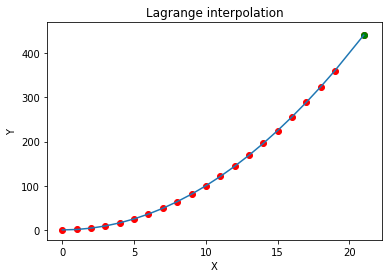

In [41]:
import matplotlib.pyplot as plt
plt.title("Lagrange interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(lagrange.origins[0],lagrange.origins[1],color = 'red')
plt.scatter(lagrange.xarr,lagrange.valarr,color = "green")
plt.plot(lagrange.X,lagrange.y)
plt.show()

In [45]:
import numpy as np
import pandas as pd
df = pd.read_csv("data.csv")
data_X = df.iloc[:,-1].values
data_y = df.iloc[:,1].values
data_y = [int(i/10000) for i in data_y]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 1/3, random_state = 0)
X_train = [i for i in X_train]
y_train = [i for i in y_train]
poly = Lagrange()
poly.setData(X_train,y_train)